In [1]:
import pickle
import numpy as np

In [2]:
train_fh = open('/home/uncookie/Documents/datasets/lego_data/lego-train.pickle', 'rb')
test_fh = open('/home/uncookie/Documents/datasets/lego_data/lego-test.pickle', 'rb')

train_data = pickle.load(train_fh)
test_data = pickle.load(test_fh)

train_data[0][0].shape

(48, 48, 1)

In [3]:
train_data_X = np.array([img for (img, _) in train_data[:400]])
train_data_y = np.array([lbl for (_, lbl) in train_data[:400]])

val_data_X = np.array([img for (img, _) in train_data[400:]])
val_data_y = np.array([lbl for (_, lbl) in train_data[400:]])

test_data_X = np.array([img for (img, _) in test_data])
test_data_y = np.array([lbl for (_, lbl) in test_data])

set(train_data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
import tensorflow as tf
import keras
from keras import layers

inputs = keras.Input(shape=(48, 48, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

model.summary()

2023-12-14 23:50:30.686407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 23:50:32.791158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                         

2023-12-14 23:50:38.511475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 23:50:38.798595: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 23:50:38.799440: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model.keras",
    save_best_only=True,
    monitor="val_loss"),
    
    keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=3)
    ]

history = model.fit(
    train_data_X,
    train_data_y,
    epochs=30,
    validation_data=(val_data_X, val_data_y),
    callbacks=callbacks)

Epoch 1/30


2023-12-14 23:50:40.094040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-12-14 23:50:41.421092: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x362a090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-14 23:50:41.421167: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-14 23:50:41.483913: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-14 23:50:42.129972: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 7s 96ms/step - loss: 2.2745 - accuracy: 0.1825 - val_loss: 2.1372 - val_accuracy: 0.1569
Epoch 2/30
13/13 [==============================] - 0s 29ms/step - loss: 1.8697 - accuracy: 0.3700 - val_loss: 1.8097 - val_accuracy: 0.4510
Epoch 3/30
13/13 [==============================] - 0s 26ms/step - loss: 1.3260 - accuracy: 0.5475 - val_loss: 1.3773 - val_accuracy: 0.4314
Epoch 4/30
13/13 [==============================] - 0s 25ms/step - loss: 0.9154 - accuracy: 0.6800 - val_loss: 0.6651 - val_accuracy: 0.8431
Epoch 5/30
13/13 [==============================] - 0s 19ms/step - loss: 0.4939 - accuracy: 0.8825 - val_loss: 1.8733 - val_accuracy: 0.5098
Epoch 6/30
13/13 [==============================] - 0s 24ms/step - loss: 0.5716 - accuracy: 0.8525 - val_loss: 0.2597 - val_accuracy: 0.9216
Epoch 7/30
13/13 [==============================] - 0s 23ms/step - loss: 0.1096 - accuracy: 0.9850 - val_loss: 0.2175 - val_accuracy: 0.8824
Epoch 8/30
13/13 [======

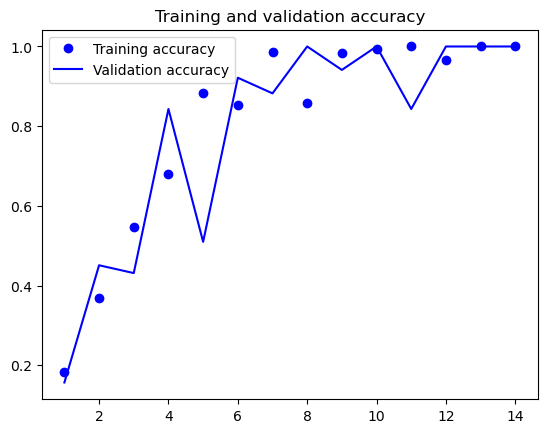

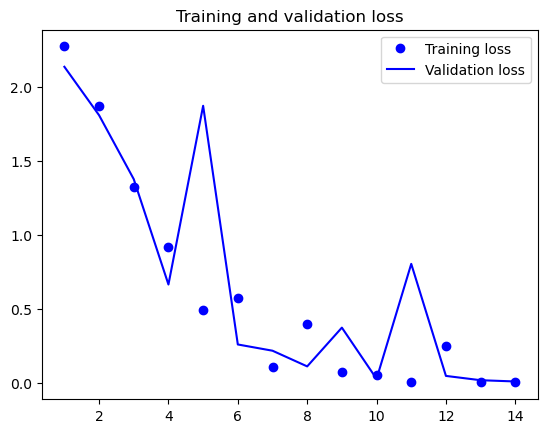

In [6]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
test_model = keras.models.load_model("model.keras")
test_loss, test_acc = test_model.evaluate(test_data_X, test_data_y)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 0s 46ms/step - loss: 0.0013 - accuracy: 1.0000
Test accuracy: 1.000
